# Overview of Different CDCL Strategies in *RoundingSat*

This document provides a complete analysis of the performance of the pseudo-Boolean solver *RoundingSat* in which
we compare the impact of the use of different CDCL strategies.

By default, this document is **not** dynamic, so as to be readable on GitLab.
You may switch to a dynamic document by setting the following variable to `True`, and re-run this Jupyter Notebook (the serialized results of the campaign are also available in this directory).
Note that the [*latest version of Metrics*](https://pypi.org/project/crillab-metrics/) must be installed in your environment to run this notebook.

In [1]:
dynamic = False
figsize = (10, 7)

## Loading the experiments

First, let us load the experiments with *Metrics*.
We note that an experiment will be considered as successfull when the solver has been able to decide whether the input formula is `SATISFIABLE` or `UNSATISFIABLE`.
Otherwise, the solver did not have enough time to decide the satisfiability of the formula, and either outputed `UNKNOWN` or nothing (if it did not have enough time to handle the `SIGTERM` signal).

In [2]:
from os import path
from metrics.wallet import Analysis, import_analysis

In [3]:
campaign_name = 'roundingsat-overview'

if path.exists(f'{campaign_name}.json'):
    # Loading the serialized campaign.
    with open(f'{campaign_name}.json') as json_analysis:
        roundingsat = import_analysis(json_analysis.read())

else:
    # Extracting the campaign from the log files of the experiments, and serializing it for later use.
    roundingsat = Analysis(f'{campaign_name}.yml',
                           is_success=lambda xp: xp['decision'] in ('SATISFIABLE', 'UNSATISFIABLE'))
    with open(f'{campaign_name}.json', 'w') as json_analysis:
        json_analysis.write(roundingsat.export())

We now keep the list of all the considered solvers to easily retrieve them later on.

In [4]:
all_solvers = roundingsat.campaign_df.xp_ware_names

In [5]:
solver_map = {
    'best': 'bump-assigned (each) - restart-picosat - delete-lbd-s',
    'best-2': 'bump-assigned (each) - restart-delete-lbd-e',
    'bump-assigned-each': 'bump-assigned (each)',
    'restart-delete-lbd-e': 'restart-delete-lbd-e',
    'default': 'default',
    'master': 'master (a17b7d0)',
    'restart-picosat': 'restart-picosat',
    'delete-lbd-s': 'delete-lbd-s',
    'VBS': 'VBS'
}

## Virtual Best Solver

Let us create the VBS to show it on cactus plots.

In [6]:
roundingsat = roundingsat.add_vbew(xp_ware_set=all_solvers,
                                   opti_col='cpu_time',
                                   vbew_name='VBS')

## Default versus Master

In order to evaluate the different strategies in *RoundingSat*, we had to create classes where there were no indirections in the original version of *RoundingSat* (a.k.a. `master`).
We also implemented a faster implementation of *Luby* restarts, based on Donald Knuth's algorithm.
Finally, some data-structures also differ between the original version of *RoundingSat* and our implementation because of the new strategies, resulting in variables being bumped in a different order.

This is why we will mostly consider the `default` configuration for comparing the differences between the strategies, to avoid biases due to implementation details.
Note that the `default` configuration uses exactly the same strategy as the `master` one, only their implementations differ.

Let us thus compare the two configurations `default` and `master`.

<AxesSubplot:title={'center':'Comparison of default and master (a17b7d0)'}, xlabel='default', ylabel='master (a17b7d0)'>

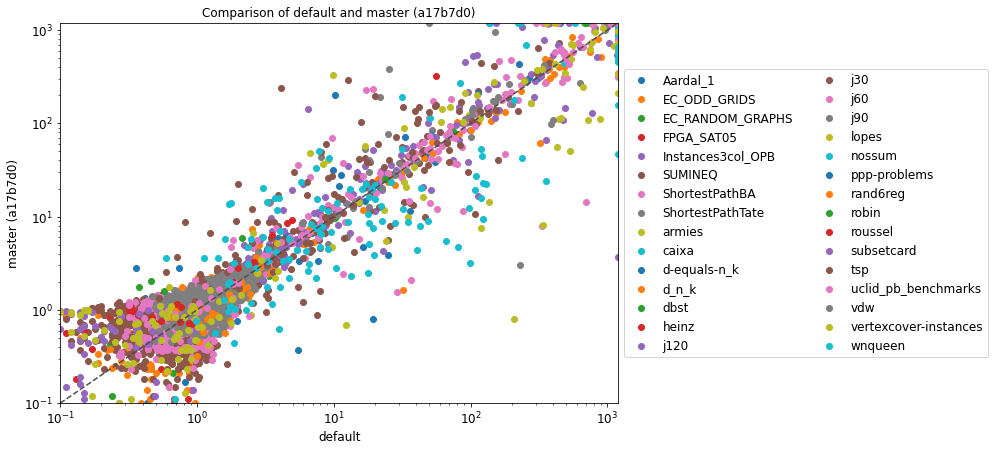

In [7]:
roundingsat.get_scatter_plot(xp_ware_x='default',
                             xp_ware_y='master',
                                  
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic)  

## Overview of the Results

First, let us get an overview of the experimental results of the different strategies with a cactus plots of their runtime.

<AxesSubplot:title={'center':'Cactus Plot of the Runtime'}, xlabel='Number of solved inputs', ylabel='Runtime (in seconds)'>

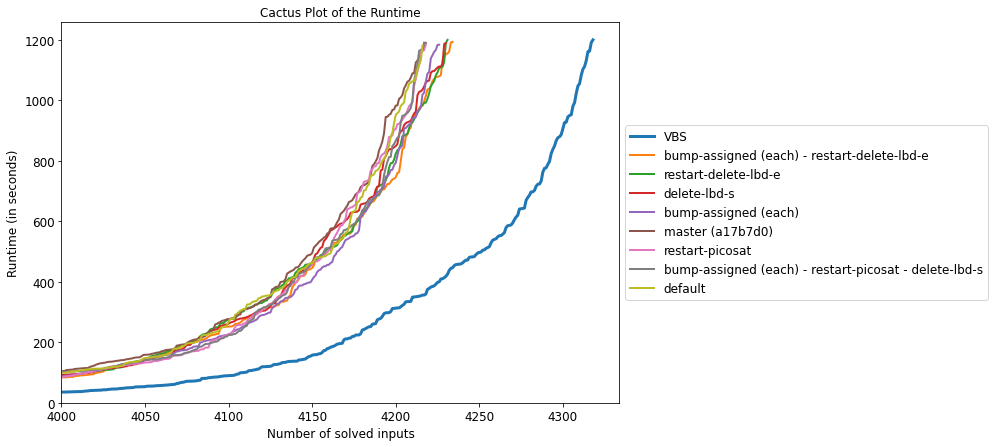

In [8]:
roundingsat.get_cactus_plot(cactus_col='cpu_time',
                            x_min=4000,
                                 
                            title='Cactus Plot of the Runtime',
                            y_axis_name="Runtime (in seconds)",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

Let us now consider the cactus plot of the number of conflicts encountered by the solver, so as to get insights about the size of the proofs built by the different configurations considered here.

<AxesSubplot:title={'center':'Cactus Plot of the Number of Conflicts'}, xlabel='Number of solved inputs', ylabel='Number of Conflicts'>

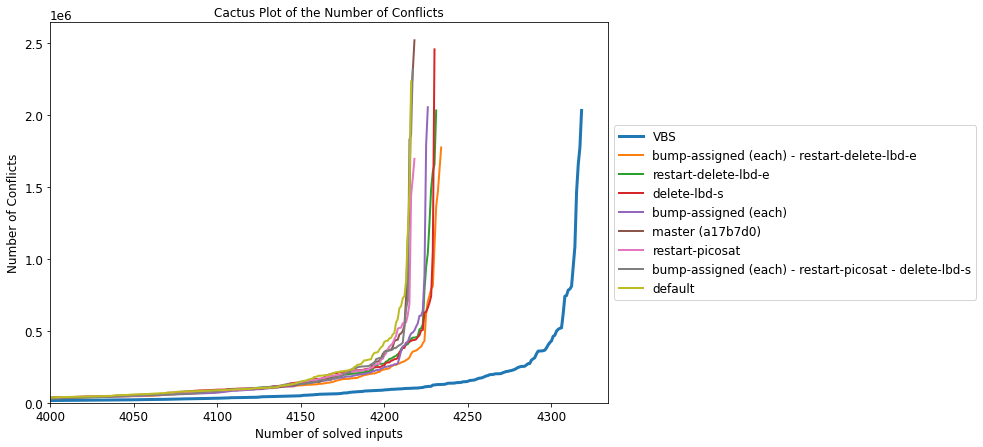

In [9]:
roundingsat.get_cactus_plot(cactus_col='conflicts',
                            x_min=4000,
                                 
                            title='Cactus Plot of the Number of Conflicts',
                            y_axis_name="Number of Conflicts",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

A more precise view of the size of the proof may be obtained by looking at the number of cancellations performed
by the solver, instead of the number of conflicts.

In [10]:
roundingsat.get_cactus_plot(cactus_col='steps',
                            x_min=4000,
                                
                            title='Cactus Plot of the Number of Cancellations',
                            y_axis_name="Number of Cancellations",
                            xp_ware_name_map=solver_map,
                            show_marker=False,

                            bbox_to_anchor=(1, 0.5),
                            legend_location='center left',
                             
                            figsize=figsize,

                            dynamic=dynamic)

<AxesSubplot:title={'center':'Cactus Plot of the Number of Cancellations'}, xlabel='Number of solved inputs', ylabel='Number of Cancellations'>

## Pairwise Comparison of the Strategies

Let us now draw different scatter plots to get deeper insights on the behavior of the different strategies.

In [11]:
roundingsat.get_scatter_plot(xp_ware_x='restart-delete-lbd-e',
                             xp_ware_y='best-2',
                                  
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic)  

<AxesSubplot:title={'center':'Comparison of restart-delete-lbd-e and bump-assigned (each) - restart-delete-lbd-e'}, xlabel='restart-delete-lbd-e', ylabel='bump-assigned (each) - restart-delete-lbd-e'>

<AxesSubplot:title={'center':'Comparison of delete-lbd-s and bump-assigned (each) - restart-delete-lbd-e'}, xlabel='delete-lbd-s', ylabel='bump-assigned (each) - restart-delete-lbd-e'>

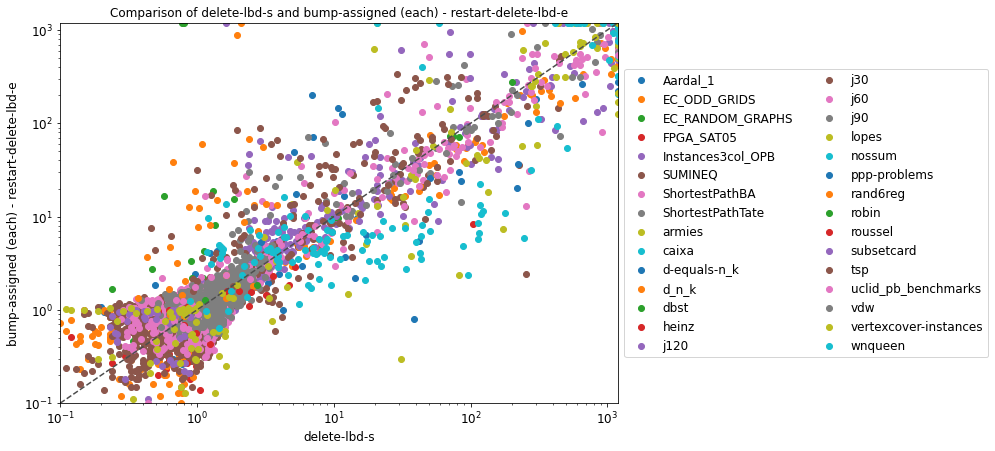

In [12]:
roundingsat.get_scatter_plot(xp_ware_x='delete-lbd-s',
                             xp_ware_y='best-2',
                                  
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic)  

In [13]:
roundingsat.get_scatter_plot(xp_ware_x='bump-assigned-each',
                             xp_ware_y='best-2',
                                  
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic)  

<AxesSubplot:title={'center':'Comparison of bump-assigned (each) and bump-assigned (each) - restart-delete-lbd-e'}, xlabel='bump-assigned (each)', ylabel='bump-assigned (each) - restart-delete-lbd-e'>

In [14]:
roundingsat.get_scatter_plot(xp_ware_x='restart-picosat',
                             xp_ware_y='best-2',
                                  
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic)  

<AxesSubplot:title={'center':'Comparison of restart-picosat and bump-assigned (each) - restart-delete-lbd-e'}, xlabel='restart-picosat', ylabel='bump-assigned (each) - restart-delete-lbd-e'>

In [15]:
roundingsat.get_scatter_plot(xp_ware_x='default',
                             xp_ware_y='best-2',
                             
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic)  

<AxesSubplot:title={'center':'Comparison of default and bump-assigned (each) - restart-delete-lbd-e'}, xlabel='default', ylabel='bump-assigned (each) - restart-delete-lbd-e'>

In [16]:
roundingsat.get_scatter_plot(xp_ware_x='master',
                             xp_ware_y='best-2',
                             
                             color_col='family',
                             xp_ware_name_map=solver_map,

                             x_min=0.1, x_max=1200, logx=True,
                             y_min=0.1, y_max=1200, logy=True,

                             bbox_to_anchor=(1, 0.5),
                             legend_location='center left',
                             ncol_legend=2,
                             
                             figsize=figsize,

                             dynamic=dynamic)  

<AxesSubplot:title={'center':'Comparison of master (a17b7d0) and bump-assigned (each) - restart-delete-lbd-e'}, xlabel='master (a17b7d0)', ylabel='bump-assigned (each) - restart-delete-lbd-e'>